In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def grad_rosenbrock(x, y):
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])


# sin(1/x) function
def sin_inv(x):
    return np.sin(1/x) if x != 0 else 0

def grad_sin_inv(x):
    return -np.cos(1/x)/(x**2) if x != 0 else 0


In [3]:
def gradient_descent(grad, init, lr, tol=1e-6, max_iter=10000):
    x = init.copy()
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(*x)
        x -= lr * g
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start


In [4]:
def momentum_gd(grad, init, lr, beta=0.9, tol=1e-6, max_iter=10000):
    x = init.copy()
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(*x)
        v = beta * v + lr * g
        x -= v
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start


In [5]:
def adagrad(grad, init, lr, eps=1e-8, tol=1e-6, max_iter=10000):
    x = init.copy()
    G = np.zeros_like(x)
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(*x)
        G += g**2
        x -= lr * g / (np.sqrt(G) + eps)
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start


In [6]:
def rmsprop(grad, init, lr, beta=0.9, eps=1e-8, tol=1e-6, max_iter=10000):
    x = init.copy()
    s = np.zeros_like(x)
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(*x)
        s = beta*s + (1-beta)*(g**2)
        x -= lr * g / (np.sqrt(s) + eps)
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start


In [7]:
def adam(grad, init, lr, beta1=0.9, beta2=0.999, eps=1e-8, tol=1e-6, max_iter=10000):
    x = init.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for t in range(1, max_iter+1):
        g = grad(*x)
        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*(g**2)

        m_hat = m / (1-beta1**t)
        v_hat = v / (1-beta2**t)

        x -= lr * m_hat / (np.sqrt(v_hat) + eps)
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start


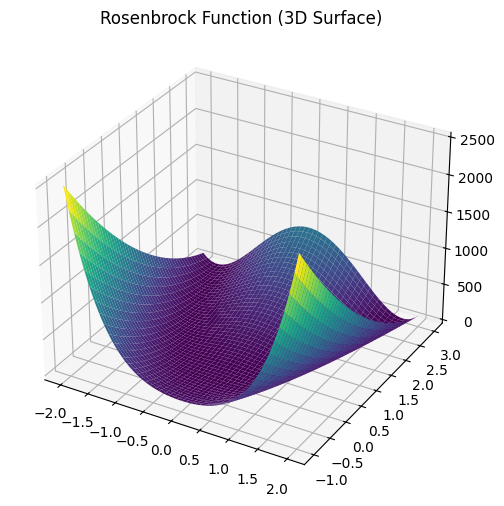

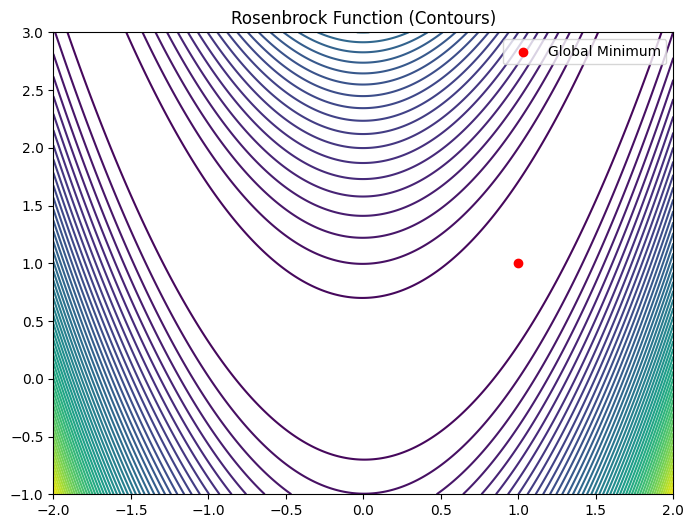

In [8]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# 3D surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Rosenbrock Function (3D Surface)")
plt.show()

# Contour plot
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.scatter(1, 1, color='red', label='Global Minimum')
plt.title("Rosenbrock Function (Contours)")
plt.legend()
plt.show()


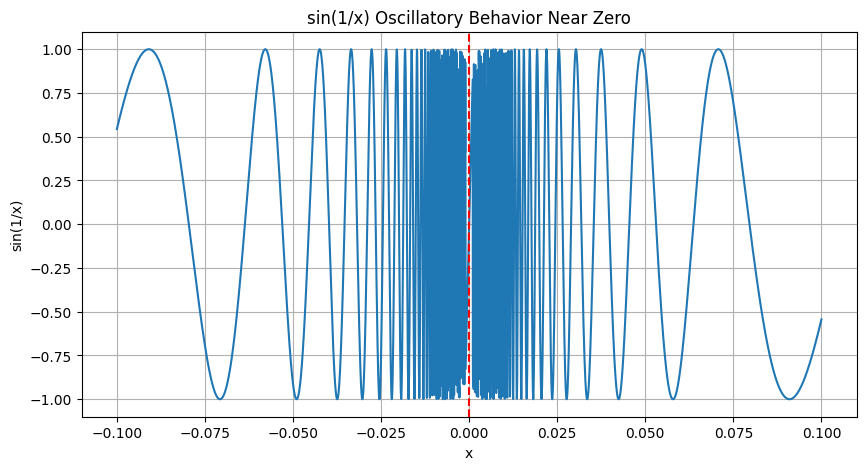

In [9]:
x_left = np.linspace(-0.1, -0.001, 2000)
x_right = np.linspace(0.001, 0.1, 2000)
x = np.concatenate((x_left, x_right))
y = np.sin(1/x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.axvline(0, color='red', linestyle='--')
plt.title("sin(1/x) Oscillatory Behavior Near Zero")
plt.xlabel("x")
plt.ylabel("sin(1/x)")
plt.grid(True)
plt.show()



Learning Rate = 0.01
GD: x*=[nan nan], f(x*)=nan, time=0.1908s


/tmp/ipython-input-2344859268.py:6: RuntimeWarning: overflow encountered in scalar power
  dx = -2*(1 - x) - 400*x*(y - x**2)
/tmp/ipython-input-2344859268.py:7: RuntimeWarning: overflow encountered in scalar power
  dy = 200*(y - x**2)
/tmp/ipython-input-2344859268.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  dx = -2*(1 - x) - 400*x*(y - x**2)
/tmp/ipython-input-2344859268.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  dy = 200*(y - x**2)


Momentum: x*=[nan nan], f(x*)=nan, time=0.2226s
Adagrad: x*=[-1.24615454  1.55905292], f(x*)=5.048995, time=0.2839s
RMSProp: x*=[0.9901431  0.96553191], f(x*)=0.022154, time=0.5233s
Adam: x*=[0.99999903 0.99999806], f(x*)=0.000000, time=0.4657s


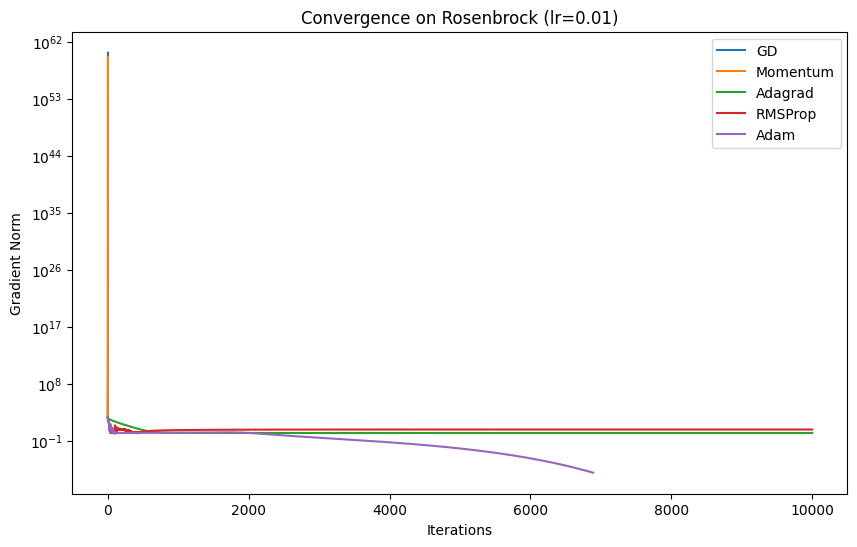


Learning Rate = 0.05
GD: x*=[nan nan], f(x*)=nan, time=0.1292s
Momentum: x*=[nan nan], f(x*)=nan, time=0.1408s
Adagrad: x*=[-3.06759804e-03  5.56099353e-05], f(x*)=1.006145, time=0.1505s
RMSProp: x*=[0.725    0.465625], f(x*)=0.435625, time=0.2039s
Adam: x*=[0.99999902 0.99999803], f(x*)=0.000000, time=0.0734s


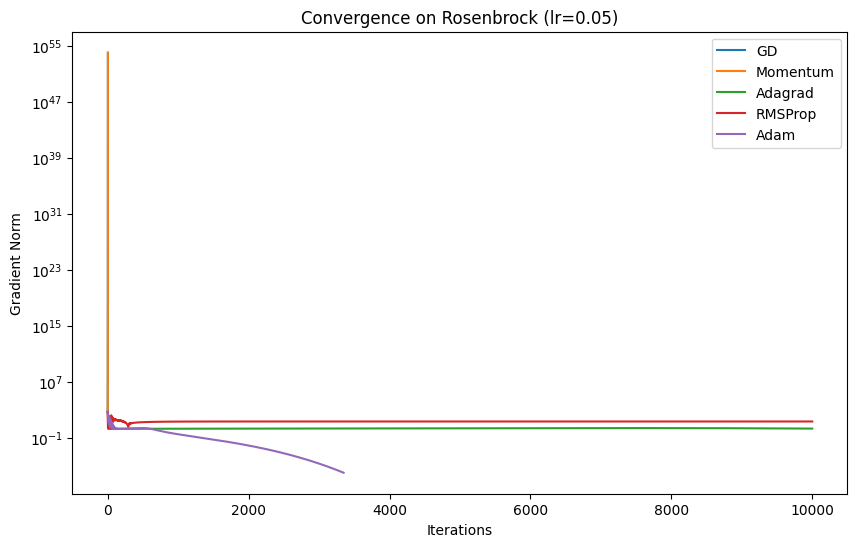


Learning Rate = 0.1
GD: x*=[nan nan], f(x*)=nan, time=0.1176s
Momentum: x*=[nan nan], f(x*)=nan, time=0.1353s
Adagrad: x*=[0.81290538 0.6602692 ], f(x*)=0.035034, time=0.1486s
RMSProp: x*=[0.3   0.015], f(x*)=1.052500, time=0.2035s
Adam: x*=[0.99999902 0.99999804], f(x*)=0.000000, time=0.0523s


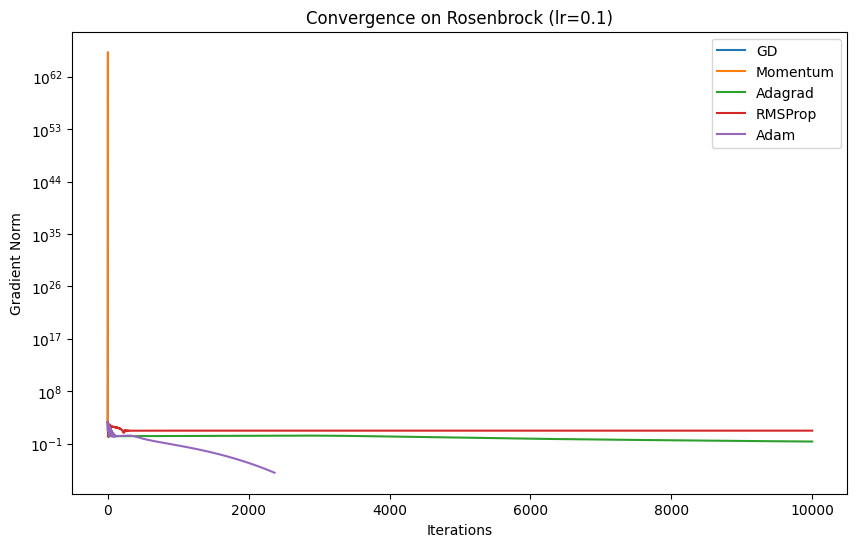

In [10]:
optimizers = {
    "GD": gradient_descent,
    "Momentum": momentum_gd,
    "Adagrad": adagrad,
    "RMSProp": rmsprop,
    "Adam": adam
}

learning_rates = [0.01, 0.05, 0.1]
init = np.array([-1.5, 1.5])

for lr in learning_rates:
    plt.figure(figsize=(10, 6))
    print(f"\nLearning Rate = {lr}")

    for name, opt in optimizers.items():
        x_opt, history, t = opt(grad_rosenbrock, init, lr)
        f_val = rosenbrock(x_opt[0], x_opt[1])

        print(f"{name}: x*={x_opt}, f(x*)={f_val:.6f}, time={t:.4f}s")
        plt.plot(history, label=name)

    plt.yscale("log")
    plt.xlabel("Iterations")
    plt.ylabel("Gradient Norm")
    plt.title(f"Convergence on Rosenbrock (lr={lr})")
    plt.legend()
    plt.show()



Learning Rate = 0.01
GD: x*=6.671856, f(x*)=0.149323
Momentum: x*=19.510280, f(x*)=0.051233
Adagrad: x*=0.057875, f(x*)=-1.000000
RMSProp: x*=0.096828, f(x*)=-0.785049
Adam: x*=0.057875, f(x*)=-1.000000


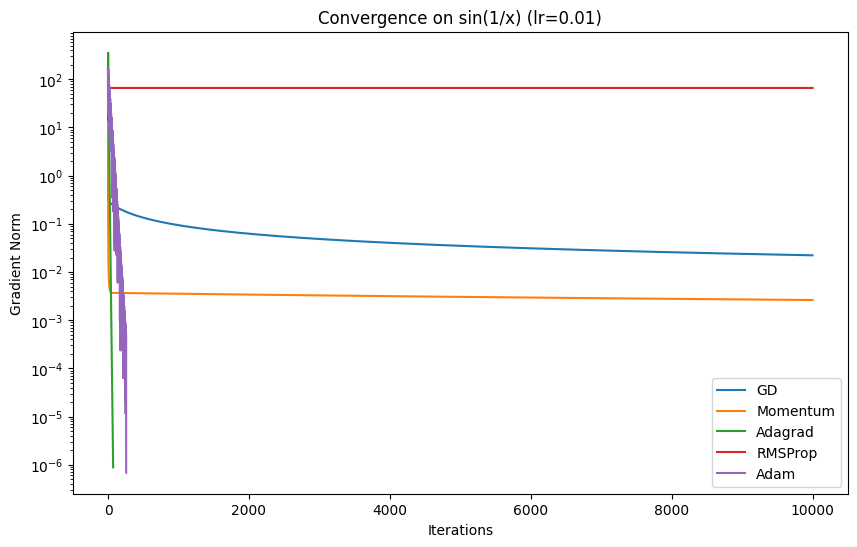


Learning Rate = 0.05
GD: x*=12.696893, f(x*)=0.078678
Momentum: x*=82.420946, f(x*)=0.012133
Adagrad: x*=0.090946, f(x*)=-1.000000
RMSProp: x*=0.212207, f(x*)=-1.000000
Adam: x*=0.090946, f(x*)=-1.000000


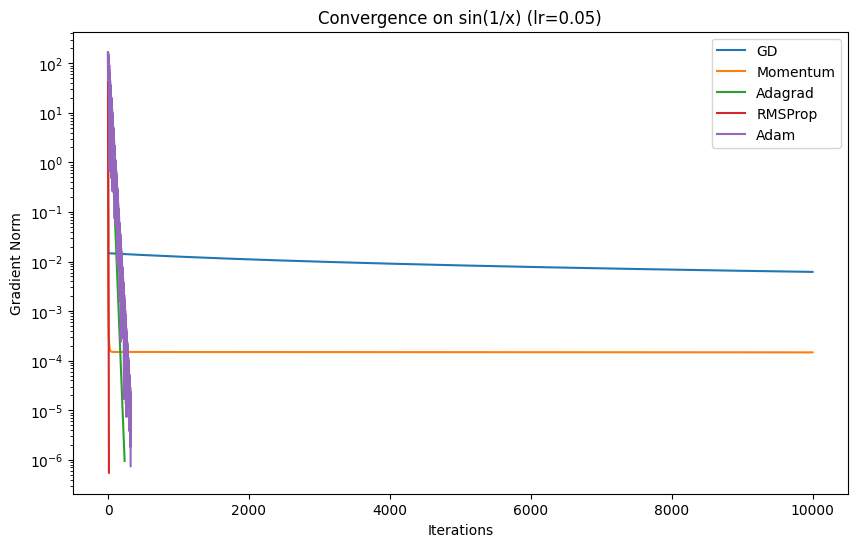


Learning Rate = 0.1
GD: x*=19.473351, f(x*)=0.051330
Momentum: x*=163.662999, f(x*)=0.006110
Adagrad: x*=0.212207, f(x*)=-1.000000
RMSProp: x*=0.280700, f(x*)=-0.408605
Adam: x*=0.212207, f(x*)=-1.000000


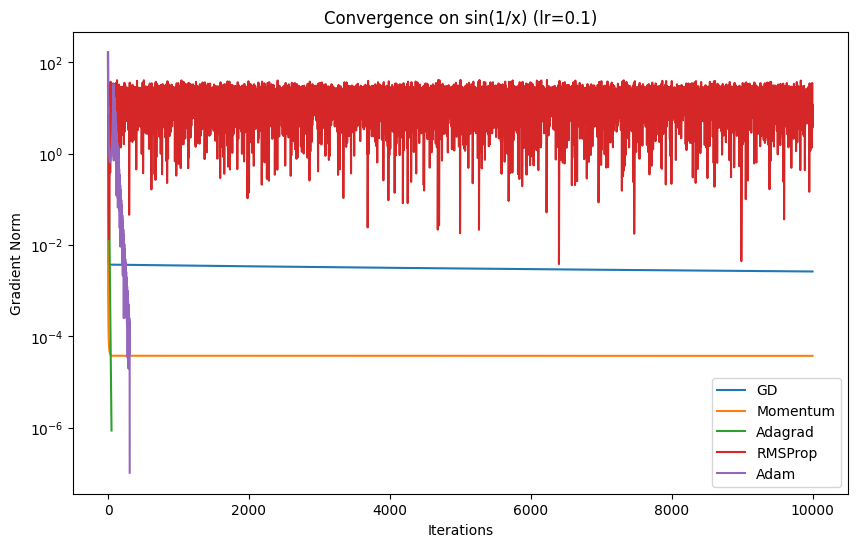

In [11]:
init = np.array([0.05])

for lr in learning_rates:
    plt.figure(figsize=(10, 6))
    print(f"\nLearning Rate = {lr}")

    for name, opt in optimizers.items():
        x_opt, history, t = opt(
            lambda x: np.array([grad_sin_inv(x)]),
            init,
            lr
        )
        print(f"{name}: x*={x_opt[0]:.6f}, f(x*)={sin_inv(x_opt[0]):.6f}")
        plt.plot(history, label=name)

    plt.yscale("log")
    plt.xlabel("Iterations")
    plt.ylabel("Gradient Norm")
    plt.title(f"Convergence on sin(1/x) (lr={lr})")
    plt.legend()
    plt.show()
